# Replication with Python from Jupyter
### Matt Ingram
### University at Albany, SUNY
# Replication 1: Lacina (2006)
### __Computing Tools__: Python and markdown in JupyterHub
### __Subject fields__: political science, international relations, civil war, political violence, conflict studies, peace science
### __Methods topics__: data management, descriptive statistics, histograms, OLS

# Introduction

This notebook documents a replication of Lacina (2006) in Python from within the Jypyter platform. 

Python runs natively in Jupyter, so no kernel needs to be installed as was done with Stata. 

I am using JupyterHub and JupyterLab. JupyterHub is a server-based version of Jupyter that allows central installation of software and multiple users. In academic settings, the advantages are:
- shared resources to avoid duplication and enhance collaboration
- secure sign-on with instiutional IDs and passwords
- remote computing
- extensions to use JupyterHub as a learning management system, including assigmment management

JupyterLab is an interface that mimics features of an integrated development environment (IDE), allowing multiple notebooks to be opened at once, side by side, while at the same time being able to view directory, pull-down menus, etc.

For more information on Jupyter, see: http://jupyter.org/

For more information on JupyterHub, see: https://github.com/jupyterhub/jupyterhub

For more information on JupyterLab, see: https://github.com/jupyterlab/jupyterlab

# Set Environment

## Import Python modules (packages)

In [1]:
import os
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as sm
import seaborn as sns
import inspect # contains getsource() function to inspect source code

# Set Working Directory

In [6]:
print(os.getcwd()) # check current working dir
path = '/home1/s/m/mi122167/OpenStats/replication1lacina'
os.chdir(path)
print(os.getcwd()) # ensure cwd changed to desired dir

/home1/s/m/mi122167/OpenStats/replication1lacina
/home1/s/m/mi122167/OpenStats/replication1lacina


# Create sub-directories

In [12]:
os.makedirs('./code', exist_ok=True)
os.makedirs('./data', exist_ok=True)
os.makedirs('./figures', exist_ok=True)
os.makedirs('./tables', exist_ok=True)

# Load Data

In [2]:
url="http://mattingram.net/teaching/workshops/introR/materials/Lacina_JCR_2006_replication.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.iloc[0:5, 0:10]     # .iloc allows indexing within an object, here a dataframe

,ID,conflict_name,ccode,cname,region,secession,battledeadbest,lnbdb,battledeadlow,lnbdl
0,1990,India (Mizoram),750,IND,3,1,900,6.802395,900,6.802395
1,1500,Argentina 1955,160,ARG,2,0,900,6.802395,900,6.802395
2,2770,Romania 1989,360,RUM,5,0,909,6.812345,909,6.812345
3,2970,Croatia 1992-5,344,CRO,5,1,950,6.856462,950,6.856462
4,3000,Georgia (South Ossetia),372,GRG,3,1,950,6.856462,950,6.856462


In [3]:
# examine source code of pd.read_csv()
print(inspect.getsource(pd.read_csv))

    def parser_f(filepath_or_buffer,
                 sep=sep,
                 delimiter=None,

                 # Column and Index Locations and Names
                 header='infer',
                 names=None,
                 index_col=None,
                 usecols=None,
                 squeeze=False,
                 prefix=None,
                 mangle_dupe_cols=True,

                 # General Parsing Configuration
                 dtype=None,
                 engine=None,
                 converters=None,
                 true_values=None,
                 false_values=None,
                 skipinitialspace=False,
                 skiprows=None,
                 nrows=None,

                 # NA and Missing Data Handling
                 na_values=None,
                 keep_default_na=True,
                 na_filter=True,
                 verbose=False,
                 skip_blank_lines=True,

                 # Datetime Handling
                 parse_dates=False,
   

In [4]:
data.shape[0]

114

Notice that the observation identifier begins with 0 in Python. This is different from R and Stata.

In Python, if you want the first element of any object, that element is '0'.
In R or Stata, the first element is '1'.

# Summary Statistics

In [5]:
data = data.loc[:,['battledeadbest', 'lnbdb', 'lnduration', 'lnpop', 'lnmilqual', 'lngdp', 
                   'cw', 'lnmountain', 'democ', 'ethnicpolar', 'relpolar', 'region']]
data.describe()

,battledeadbest,lnbdb,lnduration,lnpop,lnmilqual,lngdp,cw,lnmountain,democ,ethnicpolar,relpolar,region
count,1.140000e+02,114.000000,114.000000,114.000000,112.000000,107.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,6.267714e+04,9.362349,1.557192,16.759923,7.949597,7.028581,0.666667,2.688314,0.175439,0.780702,0.780702,3.245614
std,2.308558e+05,1.711143,1.136839,1.730417,1.375276,0.972850,0.473486,1.115343,0.382021,0.415598,0.415598,1.742551
min,9.000000e+02,6.802395,0.000000,13.322850,0.924259,3.912023,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.196750e+03,8.069801,0.693147,15.530885,7.039719,6.341176,0.000000,2.116256,0.000000,1.000000,1.000000,2.000000
50%,9.525000e+03,9.160430,1.386294,16.642145,8.084830,7.074963,1.000000,2.631889,0.000000,1.000000,1.000000,3.000000
75%,4.047500e+04,10.607800,2.463154,17.768860,8.741252,7.754624,1.000000,3.646096,0.000000,1.000000,1.000000,4.750000
max,2.097705e+06,14.556350,4.007333,20.650010,11.121360,9.052165,1.000000,4.406719,1.000000,1.000000,1.000000,6.000000


# Histograms of outcome of interest

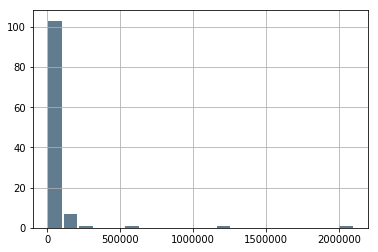

In [6]:
data['battledeadbest'].hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.show()

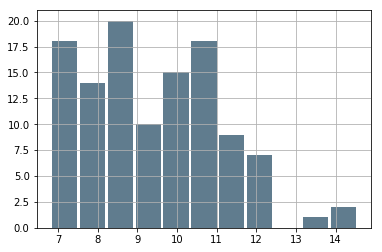

In [7]:
data['lnbdb'].hist(grid=True, bins=int(data.shape[0]/10), rwidth=0.9,
                   color='#607c8e')
plt.show()

# Histogram with seaborn module

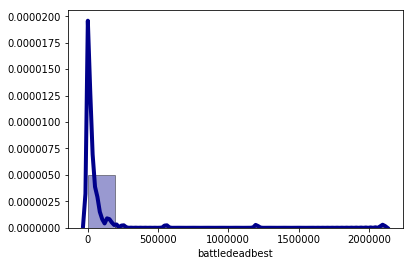

In [8]:
sns.distplot(data.battledeadbest, hist=True, kde=True, 
             bins=int(data.shape[0]/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, 
             kde_kws={'linewidth': 4})

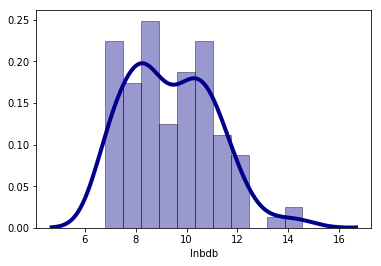

In [9]:
sns.distplot(data.lnbdb, hist=True, kde=True, 
             bins=int(data.shape[0]/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Linear Regression

## OLS with Statsmodels package

This is Table 2 from original paper.

Model takes the form of $y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \epsilon$.

In matrix notation, $y = X\beta + \epsilon$, where y is a vector containing the outcome of interest (lnbdb), $X$ is a matrix of predictors (model matrix), and $\epsilon$ is the error term.

In [10]:
m1 = sm.ols(formula="lnbdb ~ lnduration + lnpop + lnmilqual + lngdp + cw + lnmountain + democ + ethnicpolar + relpolar", 
                data=data).fit()
m2 = sm.ols(formula="lnbdb ~ lnduration + cw + democ + ethnicpolar", 
                data=data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnbdb   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     8.589
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           2.58e-09
Time:                        15:26:56   Log-Likelihood:                -173.20
No. Observations:                 105   AIC:                             366.4
Df Residuals:                      95   BIC:                             392.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5426      1.975      4.831      0.000       5.621      13.464
lnduration      0.8072      0.119      6.778      0.000       0.571       1.044
lnpop          -0.0444      0.081     -0.551      0.583      -0.205       0.116
lnmilqual       0.1005      0.120      0.841      0.403      -0.137       0.338
lngdp          -0.1908      0.175     -1.089      0.279      -0.539       0.157
cw              0.6666      0.313      2.128      0.036       0.045       1.289
lnmountain      0.1012      0.120      0.845      0.400      -0.137       0.339
democ          -0.8706      0.358     -2.433      0.017      -1.581      -0.160
ethnicpolar    -0.9805      0.339     -2.894      0.005      -1.653      -0.308
relpolar        0.1187      0.323      0.367      0.714      -0.523       0.760
==============================================================================
Omnibus:                        3.723   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.676
Skew:                           0.451   Prob(JB):                        0.159
Kurtosis:                       2.837   Cond. No.                         312.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lnbdb   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     22.03
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           2.42e-13
Time:                        15:26:56   Log-Likelihood:                -188.73
No. Observations:                 114   AIC:                             387.5
Df Residuals:                     109   BIC:                             401.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.5965      0.347     24.763      0.000       7.908       9.285
lnduration      0.8572      0.111      7.751      0.000       0.638       1.076
cw              0.5908      0.269      2.199      0.030       0.058       1.123
democ          -0.9122      0.326     -2.795      0.006      -1.559      -0.265
ethnicpolar    -1.0283      0.303     -3.389      0.001      -1.630      -0.427
==============================================================================
Omnibus:                        3.192   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                3.045
Skew:                           0.399   Prob(JB):                        0.218
Kurtosis:                       2.928   Cond. No.                         8.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS with Sklearn package

In [12]:
m1 = linear_model.LinearRegression()
X = data.loc[:,['lnduration', 'lnpop', 'lnmilqual', 'lngdp', 'cw', 'lnmountain', 'democ', 'ethnicpolar', 'relpolar']]
X.head()
y = data.loc[:,['lnbdb']]
y.head()
# same as data.lnbdb[:5]

,lnbdb
0,6.802395
1,6.802395
2,6.812345
3,6.856462
4,6.856462


In [13]:
np.any(np.isnan(X))
# returns true
data = data.dropna()
X = data.loc[:,['lnduration', 'lnpop', 'lnmilqual', 'lngdp', 'cw', 'lnmountain', 'democ', 'ethnicpolar', 'relpolar']]
y = data.loc[:,['lnbdb']]

In [14]:
m1 = linear_model.LinearRegression()
m1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(m1.intercept_)
print(m1.coef_)

[9.54259027]
[[ 0.807215   -0.04444595  0.10053529 -0.19076226  0.66663469  0.10118106
  -0.87060374 -0.98045929  0.1187261 ]]


In [16]:
pd.DataFrame(list(zip(X.columns, np.transpose(m1.coef_))), columns = ['predictors', 'coefficients'])

,predictors,coefficients
0,lnduration,[0.8072149997024606]
1,lnpop,[-0.044445949534231324]
2,lnmilqual,[0.10053528997739818]
3,lngdp,[-0.1907622610196415]
4,cw,[0.6666346895099091]
5,lnmountain,[0.10118105893268285]
6,democ,[-0.8706037365715495]
7,ethnicpolar,[-0.9804592886919066]
8,relpolar,[0.11872610275010292]


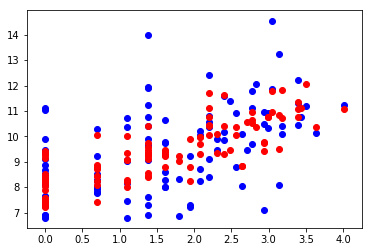

In [17]:
plt.scatter(data.lnduration, data.lnbdb, color='blue')
yhat = m1.predict(X)
plt.scatter(data.lnduration, yhat, color='red')
plt.show()

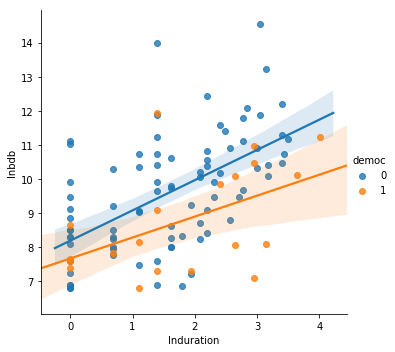

In [18]:
sns.lmplot(x="lnduration", y="lnbdb", hue="democ", data=data);

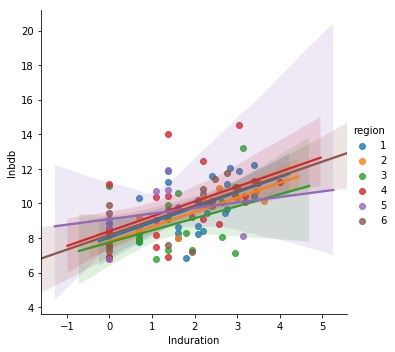

In [19]:
sns.lmplot(x="lnduration", y="lnbdb", hue="region", data=data);

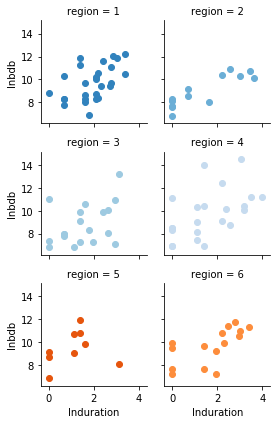

In [20]:
grid = sns.FacetGrid(data, col="region", hue="region", palette="tab20c",
                     col_wrap=2, height=2)
grid.map(plt.scatter, "lnduration", "lnbdb", marker="o")